<a href="https://colab.research.google.com/github/Efxyz/Kaggle-veri-seti-incelemesi/blob/main/Colab'e_ho%C5%9F_geldiniz_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Veri Seti: COVID-19 Patient Symptoms and Diagnosis Dataset

Hazırlayan: [EFE IŞIK]

--- Tüm Ölçeklendirme Sonuçları ---
   Original  Max_Scaling   Min-Max  Mean_Norm   Z-Score  Robust_Scaling  \
0        52     0.584270  0.579545   0.086584  0.298226        0.181818   
1        15     0.168539  0.159091  -0.333870 -1.149967       -0.659091   
2        72     0.808989  0.806818   0.313857  1.081033        0.636364   
3        61     0.685393  0.681818   0.188857  0.650489        0.386364   
4        21     0.235955  0.227273  -0.265689 -0.915125       -0.522727   

    L1_Norm   L2_Norm  L_Inf_Norm  Log_Trans   Box-Cox  Yeo-Johnson  \
0  0.000234  0.014360    0.584270   3.970292  0.375255     0.372139   
1  0.000068  0.004142    0.168539   2.772589 -1.142439    -1.146904   
2  0.000324  0.019884    0.808989   4.290459  1.043376     1.046585   
3  0.000275  0.016846    0.685393   4.127134  0.684006     0.683558   
4  0.000095  0.005799    0.235955   3.091042 -0.851937    -0.858608   

   Quantile_Uniform  Quantile_Gaussian  
0          0.590090           0.227777  
1   

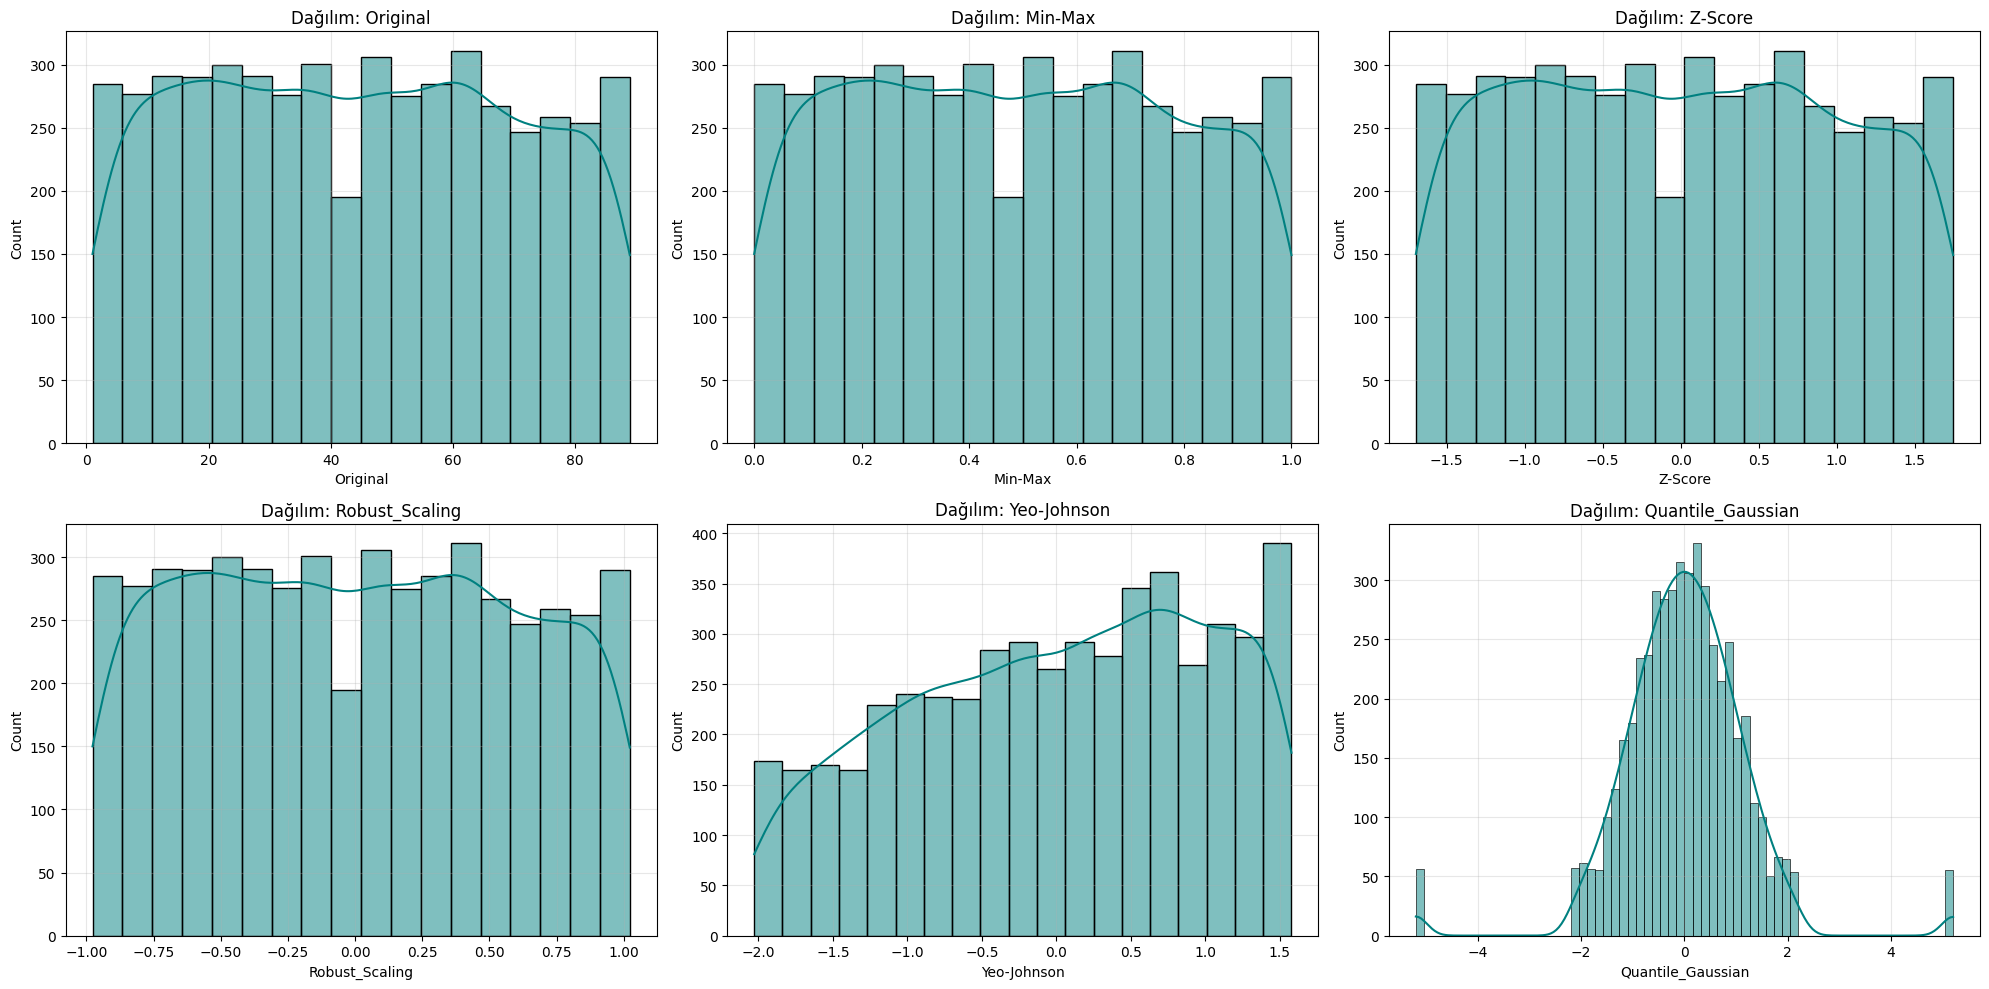

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *

file_name = 'covid19_patient_symptoms_diagnosis.csv'
df = pd.read_csv(file_name)

age_data = df[['age']].dropna()
age_values = age_data.values

results = pd.DataFrame(age_values, columns=['Original'])

# Max Scaling
results['Max_Scaling'] = MaxAbsScaler().fit_transform(age_values)

# Min-Max Scaling
results['Min-Max'] = MinMaxScaler().fit_transform(age_values)

# Mean Normalization
results['Mean_Norm'] = (age_values - np.mean(age_values)) / (np.max(age_values) - np.min(age_values))

# Z-Score Normalization
results['Z-Score'] = StandardScaler().fit_transform(age_values)

# Robust Scaling
results['Robust_Scaling'] = RobustScaler().fit_transform(age_values)

# Norm Ölçeklendirme
results['L1_Norm'] = Normalizer(norm='l1').fit_transform(age_values.T).T
results['L2_Norm'] = Normalizer(norm='l2').fit_transform(age_values.T).T
results['L_Inf_Norm'] = Normalizer(norm='max').fit_transform(age_values.T).T

results['Log_Trans'] = np.log1p(results['Original'])

if (results['Original'] > 0).all():
    results['Box-Cox'] = PowerTransformer(method='box-cox').fit_transform(age_values)
else:
    results['Box-Cox'] = "Hata: Negatif veya 0 değer var"

results['Yeo-Johnson'] = PowerTransformer(method='yeo-johnson').fit_transform(age_values)

# Quantile Transformations
results['Quantile_Uniform'] = QuantileTransformer(output_distribution='uniform').fit_transform(age_values)
results['Quantile_Gaussian'] = QuantileTransformer(output_distribution='normal').fit_transform(age_values)

print("--- Tüm Ölçeklendirme Sonuçları ---")
print(results.head())

cols_to_plot = ['Original', 'Min-Max', 'Z-Score', 'Robust_Scaling', 'Yeo-Johnson', 'Quantile_Gaussian']
plt.figure(figsize=(20, 10))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(results[col], kde=True, color='teal')
    plt.title(f'Dağılım: {col}')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()